<a href="https://colab.research.google.com/github/DuilioSM/cifar_classification/blob/main/cifar_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.datasets import cifar10

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

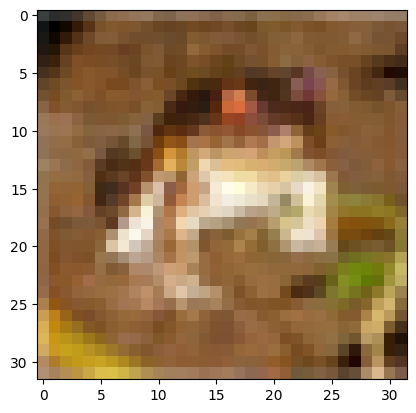

In [5]:
plt.imshow(x_train[0])

## Cleaning data

In [6]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [7]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [9]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [10]:
print('x_train shape:', x_train.shape)
print('train', x_train.shape[0])
print('val', x_valid.shape[0])
print('test', x_test.shape[0])

x_train shape: (45000, 32, 32, 3)
train 45000
val 5000
test 10000


## Creating model

In [11]:
base_filters = 32
w_regularizer = 8e-5

In [12]:
model = Sequential()
#conv1
model.add(Conv2D(base_filters, (3,3), padding='same',kernel_regularizer=regularizers.l2(w_regularizer), input_shape= x_train.shape[1:]))
model.add(Activation('relu'))

#conv2
model.add(Conv2D(base_filters, (3,3), padding='same',kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#conv3
model.add(Conv2D(2*base_filters, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

## conv 4
model.add(Conv2D(2*base_filters, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

## conv 5
model.add(Conv2D(4*base_filters,(3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation('relu'))

## conv 6
model.add(Conv2D(4*base_filters, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))



## Clasificacion - Flatten
model.add(Flatten())
#usamos finalmente softmax, porque problema de clasificacion multiple

model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [14]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
                validation_data=(x_valid,y_valid),
                verbose=2, shuffle=True)

Epoch 1/100
1407/1407 - 17s - loss: 1.6690 - accuracy: 0.3910 - val_loss: 1.3016 - val_accuracy: 0.5348 - 17s/epoch - 12ms/step
Epoch 2/100
1407/1407 - 8s - loss: 1.2488 - accuracy: 0.5630 - val_loss: 1.0494 - val_accuracy: 0.6458 - 8s/epoch - 6ms/step
Epoch 3/100
1407/1407 - 9s - loss: 1.0985 - accuracy: 0.6263 - val_loss: 0.9652 - val_accuracy: 0.6810 - 9s/epoch - 6ms/step
Epoch 4/100
1407/1407 - 8s - loss: 1.0110 - accuracy: 0.6622 - val_loss: 0.9317 - val_accuracy: 0.6948 - 8s/epoch - 6ms/step
Epoch 5/100
1407/1407 - 8s - loss: 0.9554 - accuracy: 0.6840 - val_loss: 0.8931 - val_accuracy: 0.7078 - 8s/epoch - 5ms/step
Epoch 6/100
1407/1407 - 8s - loss: 0.9048 - accuracy: 0.7050 - val_loss: 0.8479 - val_accuracy: 0.7372 - 8s/epoch - 6ms/step
Epoch 7/100
1407/1407 - 9s - loss: 0.8679 - accuracy: 0.7239 - val_loss: 0.8135 - val_accuracy: 0.7460 - 9s/epoch - 6ms/step
Epoch 8/100
1407/1407 - 8s - loss: 0.8422 - accuracy: 0.7329 - val_loss: 0.7370 - val_accuracy: 0.7724 - 8s/epoch - 6ms/st

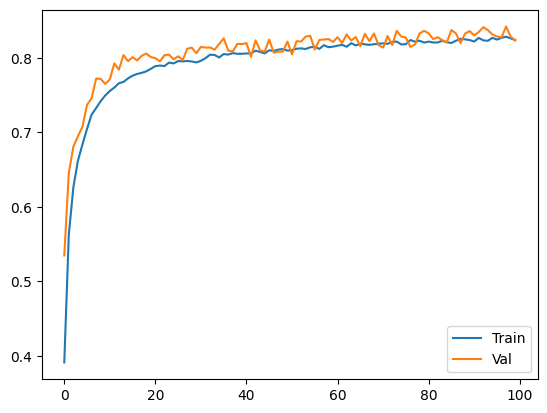

In [15]:
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6959 - accuracy: 0.8149


[0.6959064602851868, 0.8148999810218811]